In [1]:
import sys,os
import pandas as pd
import numpy as np
import warnings

import tensorflow as tf
from sklearn.utils import shuffle
from joblib import load, dump
from itertools import chain
import matplotlib.pyplot as plt
import seaborn as sns

from aggmap import AggMap
import aggmap

warnings.filterwarnings("ignore")


def tracked_orignal_change(orignal_image, new_mp):
    
    #mp = mp_ORSAggS4
    #orignal_image = trainX_OR1[0]
    df = new_mp._S.df.copy()
    SI = df.groupby('Subtypes').apply(lambda x:x.index.to_list())
    M, N, C = orignal_image.shape
    v = orignal_image.reshape(M*N*C, )
    arr_res = []
    for i, j in SI.items():
        j = [int(k.replace('p-',''))-1 for k in j]
        arr_1d = np.zeros(M*N, )
        arr_1d[j] = v[j]
        arr = arr_1d.reshape(M, N)  
        arr_res.append(arr)
    arr_tracked = np.stack(arr_res, axis=-1)
    return arr_tracked


In [2]:
from config import P

In [3]:
color_list = P.color_list
mnist_labels_dict = P.fmnist_labels_dict
seed = P.seed
results_save_folder = P.results_save_folder

In [4]:
if not os.path.exists(results_save_folder):
    os.makedirs(results_save_folder)

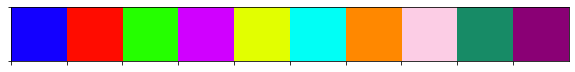

In [5]:
sns.palplot(color_list)

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data() #(x_train, y_train), (x_test, y_test)


In [7]:
## 1) orignal(c=1): OR1
_, w, h = x_train.shape
trainX_OR1 = x_train.reshape(x_train.shape[0], w, h, 1)
testX_OR1 = x_test.reshape(x_test.shape[0], w, h, 1)

label_idxs = pd.Series(y_train).to_frame(name = 'labels').groupby('labels').apply(lambda x:x.index.to_list())

orignal_cols = ['p-%s' % str((i+1)).zfill(len(str(w*h))) for i in range(w*h)]

## 1) rd shuffle
x_train_df = pd.DataFrame(x_train.reshape(x_train.shape[0], w*h), columns = orignal_cols)
x_test_df = pd.DataFrame(x_test.reshape(x_test.shape[0], w*h), columns = orignal_cols)
shuffled_cols = shuffle(orignal_cols, random_state= seed)
x_train_df = x_train_df[shuffled_cols]
x_test_df = x_test_df[shuffled_cols]

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

X = [trainX_OR1]

sizes = [60000, 30000, 12000,  6000, 600, 60]

for test_size in sizes:
    if test_size == 60000:
        dfx = x_train_df
    else:
        sss = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=0)
        tridx, tsidx = list(sss.split(x_train_df, y_train))[0]
        dfx = x_train_df.iloc[tsidx]
    
    mp = AggMap(dfx, metric = 'correlation')
    mp = mp.fit(verbose = 0, cluster_channels=1, var_thr = 0)
    x = mp.batch_transform(x_train_df.iloc[:2000].values, scale = False, n_jobs = 10)

    X.append(x)

2020-10-16 13:50:57,590 - INFO - [bidd-aggmap] - Calculating distance ...
2020-10-16 13:50:57,632 - INFO - [bidd-aggmap] - the number of process is 16


100%|##########| 784/784 [00:02<00:00, 326.00it/s]


2020-10-16 13:51:56,560 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-10-16 13:52:01,089 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)


  0%|          | 0/2000 [00:00<?, ?it/s]

2020-10-16 13:52:01,922 - INFO - [bidd-aggmap] - Finished


100%|##########| 2000/2000 [00:33<00:00, 59.72it/s]


2020-10-16 13:52:35,783 - INFO - [bidd-aggmap] - Calculating distance ...
2020-10-16 13:52:35,827 - INFO - [bidd-aggmap] - the number of process is 16


100%|##########| 784/784 [00:01<00:00, 441.12it/s]


2020-10-16 13:53:06,373 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-10-16 13:53:07,888 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)


  3%|3         | 60/2000 [00:00<00:03, 564.28it/s]

2020-10-16 13:53:08,840 - INFO - [bidd-aggmap] - Finished


100%|##########| 2000/2000 [00:03<00:00, 599.38it/s]


2020-10-16 13:53:12,433 - INFO - [bidd-aggmap] - Calculating distance ...
2020-10-16 13:53:12,479 - INFO - [bidd-aggmap] - the number of process is 16


100%|##########| 784/784 [00:01<00:00, 582.48it/s]


2020-10-16 13:53:27,001 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-10-16 13:53:28,542 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)


  3%|3         | 60/2000 [00:00<00:03, 565.75it/s]

2020-10-16 13:53:29,364 - INFO - [bidd-aggmap] - Finished


100%|##########| 2000/2000 [00:03<00:00, 550.20it/s]


2020-10-16 13:53:33,352 - INFO - [bidd-aggmap] - Calculating distance ...
2020-10-16 13:53:33,396 - INFO - [bidd-aggmap] - the number of process is 16


100%|##########| 784/784 [00:01<00:00, 647.80it/s]


2020-10-16 13:53:46,677 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-10-16 13:53:48,346 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)


  3%|3         | 60/2000 [00:00<00:03, 540.35it/s]

2020-10-16 13:53:49,258 - INFO - [bidd-aggmap] - Finished


100%|##########| 2000/2000 [00:03<00:00, 564.75it/s]


2020-10-16 13:53:53,142 - INFO - [bidd-aggmap] - Calculating distance ...
2020-10-16 13:53:53,175 - INFO - [bidd-aggmap] - the number of process is 16


100%|##########| 784/784 [00:00<00:00, 801.88it/s]


2020-10-16 13:54:05,691 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-10-16 13:54:07,230 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)


  3%|3         | 60/2000 [00:00<00:03, 542.83it/s]

2020-10-16 13:54:07,986 - INFO - [bidd-aggmap] - Finished


100%|##########| 2000/2000 [00:03<00:00, 583.62it/s]


2020-10-16 13:54:11,746 - INFO - [bidd-aggmap] - Calculating distance ...
2020-10-16 13:54:11,781 - INFO - [bidd-aggmap] - the number of process is 16


100%|##########| 784/784 [00:00<00:00, 829.77it/s]


2020-10-16 13:54:24,362 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-10-16 13:54:25,961 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)


  3%|2         | 52/2000 [00:00<00:04, 449.23it/s]

2020-10-16 13:54:26,938 - INFO - [bidd-aggmap] - Finished


100%|##########| 2000/2000 [00:04<00:00, 480.10it/s]


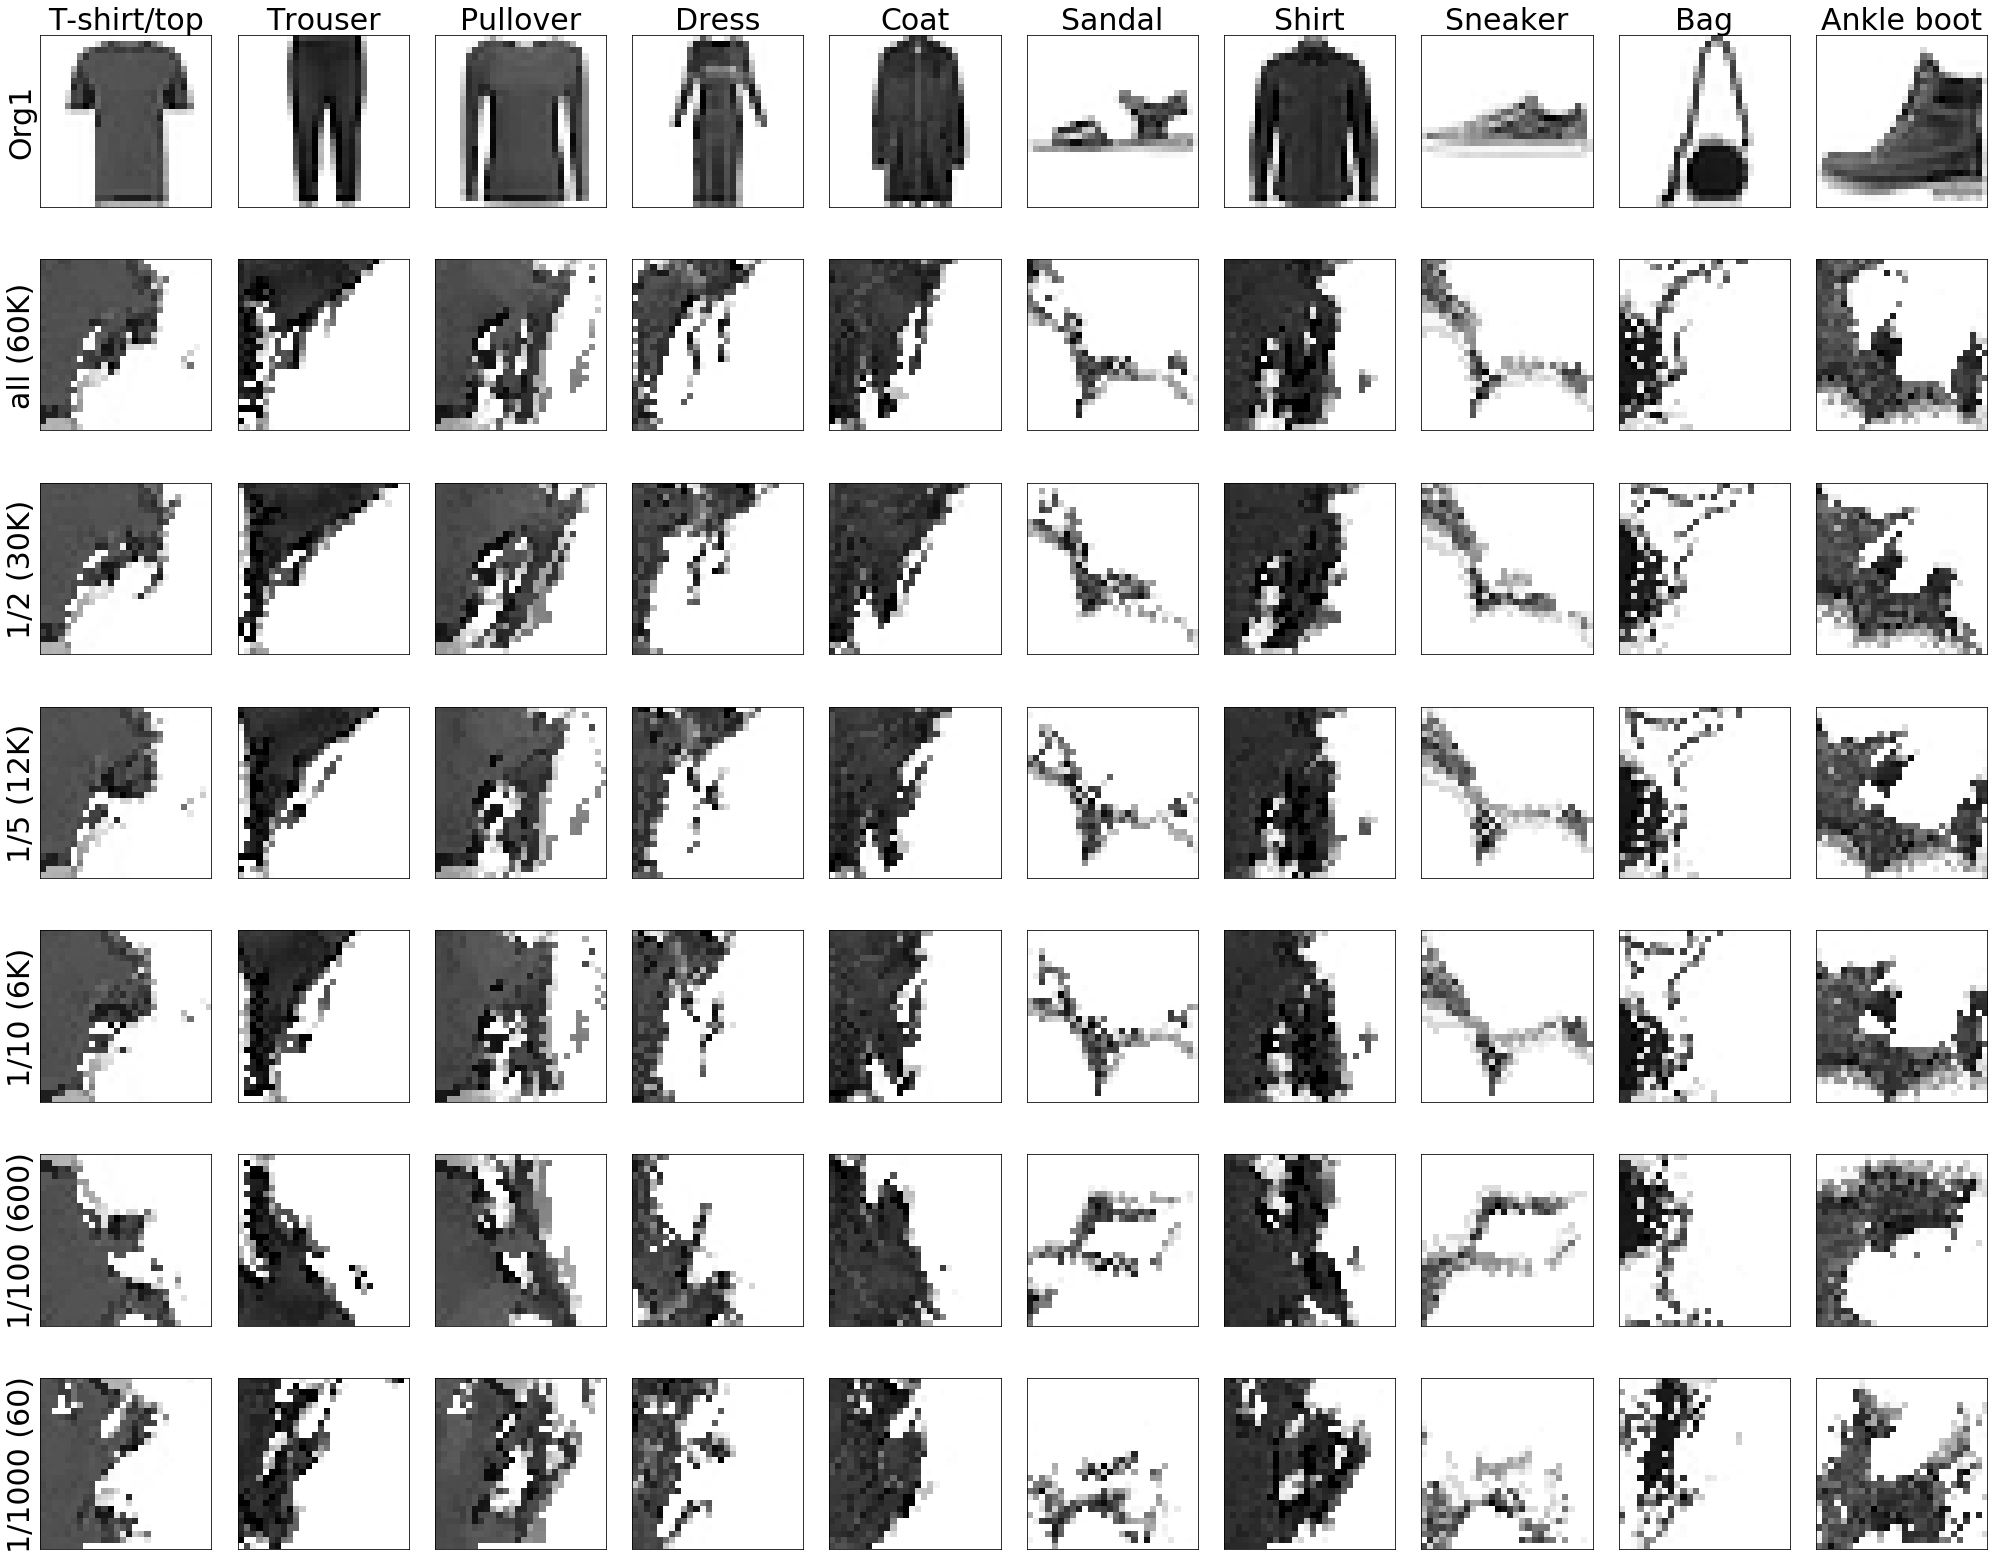

In [10]:
rows = ['Org1', 'all (60K)', '1/2 (30K)', '1/5 (12K)', '1/10 (6K)', '1/100 (600)', '1/1000 (60)']

cols = list(mnist_labels_dict.values())

image_idx = [pd.Series(label_idxs[i][:100]).sample(1, random_state = 88).to_list()[0] for i in range(len(label_idxs))]
cols = [i for i,j in zip(cols, image_idx)] # + '-%s' % j 

fig, axes = plt.subplots(nrows=7, ncols=10, figsize=(28,22), sharex = False, sharey = False)

fontsize = 30

## plot transformed images
for axc, x_ in zip(axes, X):
    for ax, idx in zip(axc, image_idx):
        x = x_[idx].astype(float)
        #imshow(x, ax=ax)
        ax.imshow(x.reshape((x.shape[0],x.shape[1])), cmap=plt.cm.Greys)
        #ax.axis('off')
        ax.set_xticks([]) 
        ax.set_yticks([])  
        
for ax, col in zip(axes[0], cols):
    ax.set_title(col, fontdict = {'fontsize': fontsize})
for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, fontsize = fontsize)    


fig.tight_layout()
fig.savefig(os.path.join(results_save_folder, 'featuremaps_11_samples_effect_blank.svg'), bbox_inches='tight', dpi=400) 
fig.savefig(os.path.join(results_save_folder, 'featuremaps_11_samples_effect_blank.pdf'), bbox_inches='tight', dpi=400) 